In [11]:
import numpy as np

In [38]:
AB = np.array([200, 50, 0, 0])
OPS = np.array([0.9, 0.4, 0.0, 0.0])
Pred = np.array([0.95, 0.35, 0.5, 0.3])
WRMSE = 0

In [39]:
for i in range(4):
    a = np.sqrt((((OPS[i]-Pred[i])**2)*AB[i]) / np.sum(AB))
    WRMSE += a
print('WRMSE : ', np.round(WRMSE, 4))

WRMSE :  0.0671


In [21]:
class Metrics():
    def __init__(self, ops, pred, ab):
        self.ops = ops
        self.pred = pred
        self.ab = ab

In [26]:
def out_wrmse(self):
    wrmse_valse = \
    np.sqrt((((self.ops-self.pred)**2) * self.ab) / np.sum(self.ab))
    print('WRMSE_i : ', np.round(wrmse_valse, 4))
    wrmse_total = np.sum(wrmse_valse)
    wrmse_total = np.round(wrmse_total, 4)
    return wrmse_total

Metrics.wrmse = out_wrmse

In [27]:
C_wrmse = Metrics(OPS, Pred, AB)
print("Total value of WRMSE : ", C_wrmse.wrmse())

WRMSE_i :  [0.0447 0.0224 0.     0.    ]
Total value of WRMSE :  0.0671


# EDA

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import platform
import warnings
warnings.filterwarnings('ignore')

In [48]:
preseason_df = pd.read_csv('data/Pre_Season_Batter.csv')
regular_season_df = pd.read_csv('data/Regular_Season_Batter.csv')

In [47]:
print('preseason_df.shape : ', preseason_df.shape)
print('regular_season_df.shape : ', regular_season_df.shape)

preseason_df.shape :  (1393, 29)
regular_season_df.shape :  (2454, 29)


In [50]:
preseason_df.describe()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


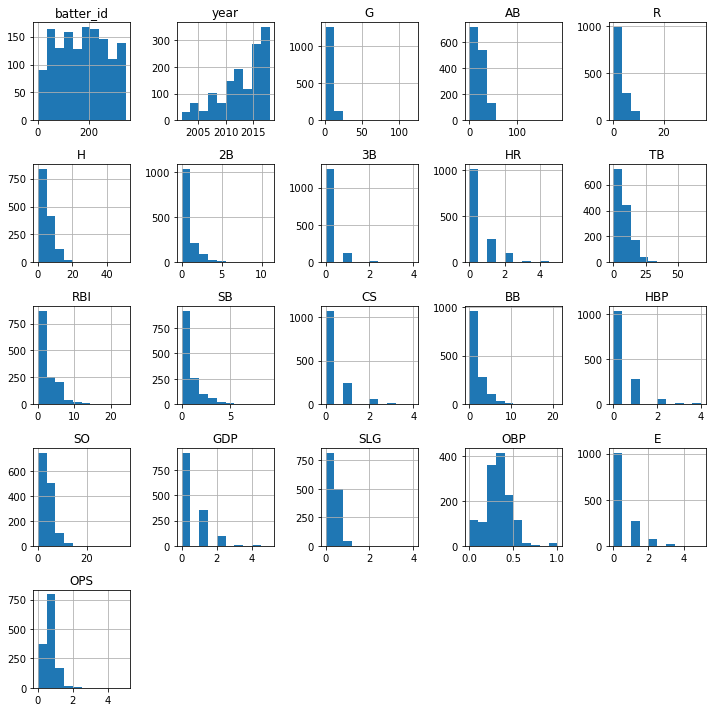

In [52]:
preseason_df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

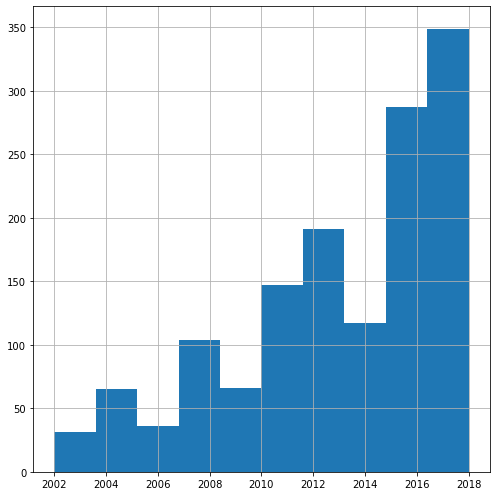

In [54]:
preseason_df['year'].hist(figsize=(7,7))
plt.tight_layout()
plt.show()

In [55]:
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

In [58]:
pd.concat([regular_count,
          preseason_count],
         axis = 1).transpose().loc[:, 2000:]

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,20.0,32.0,43.0,54.0,68.0,73.0,85.0,98.0,115.0,124.0,130.0,151.0,174.0,194.0,186.0,207.0,213.0,217.0,227.0
preseason,NaN,NaN,12.0,19.0,28.0,37.0,36.0,43.0,61.0,66.0,72.0,75.0,87.0,104.0,117.0,134.0,153.0,167.0,182.0


## Abalone 데이터를 사용한 상관관계 분석

In [59]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [64]:
correlation = df_abalone['Rings'].corr(df_abalone['Height'])
print("{} and {} - corr : {}".format('Rings','Height',round(correlation,3)))

Rings and Height - corr : 0.557


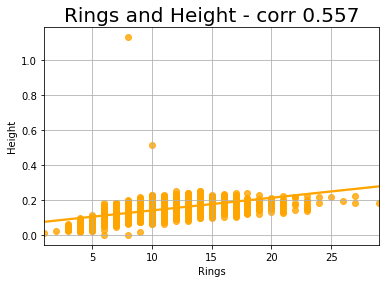

In [65]:
sns.regplot(x = df_abalone['Rings'], y = df_abalone['Height'],
           color = 'orange')

plt.title('{} and {} - corr {}'.format('Rings','Height',np.round(correlation,3)),
         fontsize=20)

plt.grid()
plt.show()

In [66]:
def corr_abalone(var_name1, var_name2):
    corr = df_abalone[var_name1].corr(df_abalone[var_name2])
    print("{} and {} - corr : {}".format(var_name1,var_name2,round(corr,3)))
    return corr

In [67]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [69]:
df_abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [70]:
len(df_abalone.columns)

9

In [72]:
df_abalone.columns[8]

'Rings'

In [73]:
for i in range(1, len(df_abalone.columns)-1):
    corr_abalone(df_abalone.columns[8], df_abalone.columns[i])

Rings and Length - corr : 0.557
Rings and Diameter - corr : 0.575
Rings and Height - corr : 0.557
Rings and Whole weight - corr : 0.54
Rings and Shucked weight - corr : 0.421
Rings and Viscera weight - corr : 0.504
Rings and Shell weight - corr : 0.628


Rings and Shell weight - corr : 0.628


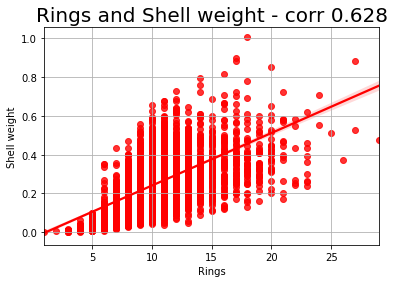

In [80]:
corr_val = corr_abalone(df_abalone.columns[8], df_abalone.columns[7])

sns.regplot(x = df_abalone['Rings'],
           y = df_abalone['Shell weight'],
           color = 'red')

plt.title('{} and {} - corr {}'.format('Rings','Shell weight',np.round(corr_val,3)),
         fontsize=20)

plt.grid()
plt.show()

## 210701 딥러닝

In [44]:
import pandas as pd 
# Pre_Season_Batter
preseason_df = pd.read_csv("data/Pre_Season_Batter.csv")
# Regular_Season_Batter
regular_season_df = pd.read_csv("data/Regular_Season_Batter.csv")

print("preseason_df.shape : ", preseason_df.shape)
print("regular_season_df.shape : ", regular_season_df.shape)

preseason_df.shape :  (1393, 29)
regular_season_df.shape :  (2454, 29)


In [29]:
regular_season_df.head(3)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686


In [30]:
regular_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2454 non-null   int64  
 1   batter_name      2454 non-null   object 
 2   year             2454 non-null   int64  
 3   team             2454 non-null   object 
 4   avg              2428 non-null   float64
 5   G                2454 non-null   int64  
 6   AB               2454 non-null   int64  
 7   R                2454 non-null   int64  
 8   H                2454 non-null   int64  
 9   2B               2454 non-null   int64  
 10  3B               2454 non-null   int64  
 11  HR               2454 non-null   int64  
 12  TB               2454 non-null   int64  
 13  RBI              2454 non-null   int64  
 14  SB               2454 non-null   int64  
 15  CS               2454 non-null   int64  
 16  BB               2454 non-null   int64  
 17  HBP           

In [45]:
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)
regular_season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2454 non-null   int64  
 1   batter_name      2454 non-null   object 
 2   year             2454 non-null   int64  
 3   team             2454 non-null   object 
 4   avg              2428 non-null   float64
 5   G                2454 non-null   int64  
 6   AB               2454 non-null   int64  
 7   R                2454 non-null   int64  
 8   H                2454 non-null   int64  
 9   2B               2454 non-null   int64  
 10  3B               2454 non-null   int64  
 11  HR               2454 non-null   int64  
 12  TB               2454 non-null   int64  
 13  RBI              2454 non-null   int64  
 14  SB               2454 non-null   int64  
 15  CS               2454 non-null   int64  
 16  BB               2454 non-null   int64  
 17  HBP           

In [46]:
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)
preseason_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1393 non-null   int64  
 1   batter_name      1393 non-null   object 
 2   year             1393 non-null   int64  
 3   team             1393 non-null   object 
 4   avg              1393 non-null   object 
 5   G                1393 non-null   int64  
 6   AB               1393 non-null   int64  
 7   R                1393 non-null   int64  
 8   H                1393 non-null   int64  
 9   2B               1393 non-null   int64  
 10  3B               1393 non-null   int64  
 11  HR               1393 non-null   int64  
 12  TB               1393 non-null   int64  
 13  RBI              1393 non-null   int64  
 14  SB               1393 non-null   int64  
 15  CS               1393 non-null   int64  
 16  BB               1393 non-null   int64  
 17  HBP           

In [47]:
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))

In [34]:
print(len(intersection_idx))

1358


## lambda 함수

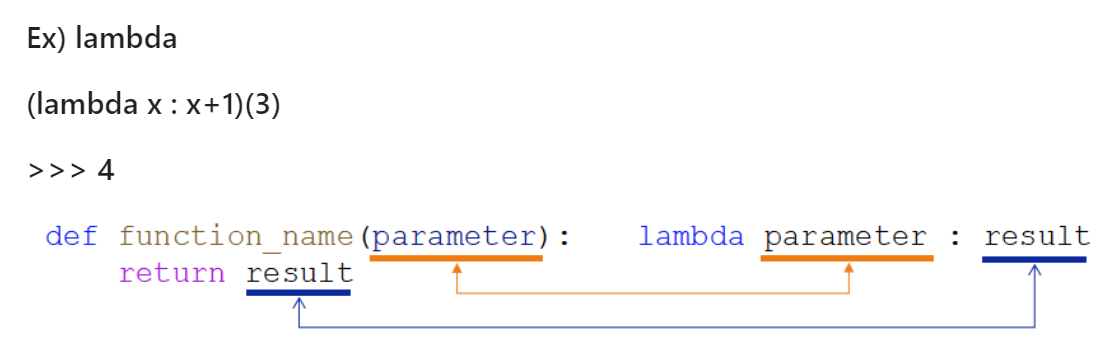

In [35]:
def x_3(x):
    y = x+3
    return y

x_3(1)

4

In [36]:
(lambda x : x+3)(1)

4

In [48]:
regular_season_new = regular_season_df.loc[regular_season_df['new_idx'].\
                     apply(lambda x : x in intersection_idx)]

In [53]:
preseason_new = preseason_df.loc[preseason_df['new_idx'].\
                                apply(lambda x : x in intersection_idx)]

In [38]:
regular_season_df['new_idx'].\
                     apply(lambda x : x in intersection_idx)[-10:]

2444     True
2445    False
2446    False
2447    False
2448    False
2449     True
2450    False
2451    False
2452    False
2453    False
Name: new_idx, dtype: bool

In [49]:
regular_season_new = regular_season_new.sort_values(by='new_idx').reset_index(drop = True)
regular_season_new

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,342,황재균,2014,롯데,0.321,128,486,66,156,33,...,0.475,0.388,16,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.863,황재균2014
1354,342,황재균,2015,롯데,0.290,144,534,95,155,41,...,0.521,0.350,16,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.871,황재균2015
1355,342,황재균,2016,롯데,0.335,127,498,97,167,26,...,0.570,0.394,15,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.964,황재균2016
1356,342,황재균,2018,KT,0.296,142,530,76,157,41,...,0.526,0.358,17,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.884,황재균2018


In [68]:
regular_season_new.shape

(1358, 30)

In [69]:
preseason_new.shape

(1358, 30)

In [70]:
import matplotlib.pyplot as plt

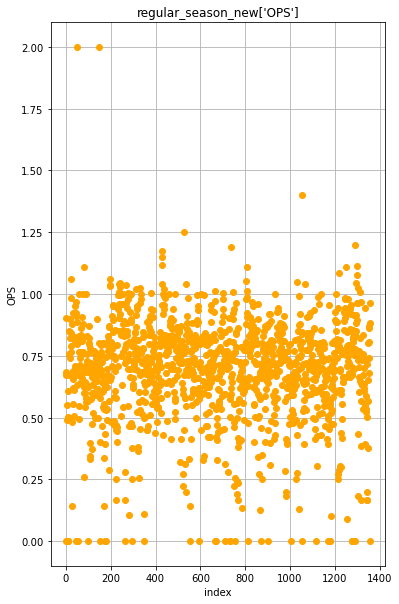

In [71]:
plt.figure(figsize = (6,10))
plt.plot(regular_season_new['OPS'], 'o', color ='orange')
plt.title("regular_season_new['OPS']")
plt.xlabel('index')
plt.ylabel('OPS')
plt.grid()
plt.show()

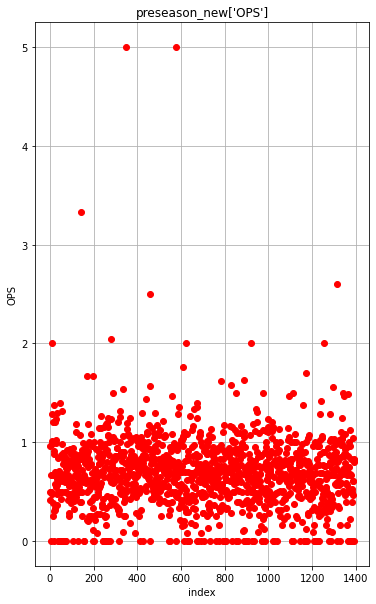

In [72]:
plt.figure(figsize = (6,10))
plt.plot(preseason_new['OPS'], 'o', color ='red')
plt.title("preseason_new['OPS']")
plt.xlabel('index')
plt.ylabel('OPS')
plt.grid()
plt.show()

In [73]:
corr = regular_season_new['OPS'].corr(preseason_new['OPS'])

In [74]:
import seaborn as sns

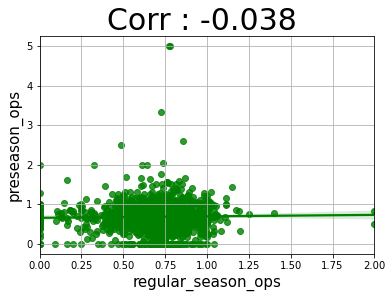

In [75]:
import numpy as np

sns.regplot(x = regular_season_new['OPS'],
           y = preseason_new['OPS'],
           fit_reg = True,
           color = 'green')

plt.title("Corr : {} ".format(np.round(corr,3)),
         fontsize = 30)
plt.xlabel("regular_season_ops", fontsize = 15)
plt.ylabel("preseason_ops", fontsize = 15)

plt.grid()
plt.show()

In [77]:
regular_season_df2 = pd.read_csv('data/Regular_Season_Batter.csv')

In [79]:
regular_season_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2454 non-null   int64  
 1   batter_name      2454 non-null   object 
 2   year             2454 non-null   int64  
 3   team             2454 non-null   object 
 4   avg              2428 non-null   float64
 5   G                2454 non-null   int64  
 6   AB               2454 non-null   int64  
 7   R                2454 non-null   int64  
 8   H                2454 non-null   int64  
 9   2B               2454 non-null   int64  
 10  3B               2454 non-null   int64  
 11  HR               2454 non-null   int64  
 12  TB               2454 non-null   int64  
 13  RBI              2454 non-null   int64  
 14  SB               2454 non-null   int64  
 15  CS               2454 non-null   int64  
 16  BB               2454 non-null   int64  
 17  HBP           

In [80]:
regular_season_df2['height/weight'][10:20]

10    180cm/82kg
11    180cm/82kg
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
Name: height/weight, dtype: object

### 1. / 를 기준으로 분리
### 2. 결측치 처리

In [82]:
regular_season_HW_OPS = regular_season_df2[['height/weight', 'OPS', 'OBP', "SLG"]]

In [83]:
regular_season_HW_OPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   height/weight  1652 non-null   object 
 1   OPS            2428 non-null   float64
 2   OBP            2430 non-null   float64
 3   SLG            2428 non-null   float64
dtypes: float64(3), object(1)
memory usage: 76.8+ KB


In [84]:
regular_season_HW_OPS = regular_season_HW_OPS.dropna(axis=0)
regular_season_HW_OPS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 0 to 2453
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   height/weight  1634 non-null   object 
 1   OPS            1634 non-null   float64
 2   OBP            1634 non-null   float64
 3   SLG            1634 non-null   float64
dtypes: float64(3), object(1)
memory usage: 63.8+ KB


In [85]:
regular_season_HW_OPS = regular_season_HW_OPS.reset_index(drop=True)
regular_season_HW_OPS[10:20]

,height/weight,OPS,OBP,SLG
10,180cm/82kg,0.000,0.000,0.000
11,180cm/82kg,0.600,0.200,0.400
12,176cm/80kg,0.000,0.000,0.000
13,176cm/80kg,0.000,0.000,0.000
14,176cm/80kg,0.504,0.200,0.304
15,176cm/80kg,0.500,0.250,0.250
16,185cm/100kg,0.000,0.000,0.000
17,185cm/100kg,0.608,0.267,0.341
18,185cm/100kg,0.673,0.307,0.366
19,185cm/100kg,0.756,0.335,0.421


In [86]:
df_row1 = []

for i in range(len(regular_season_HW_OPS)):
    df_row1.append(regular_season_HW_OPS['height/weight'][i].replace('cm', ""))

print(df_row1)    

['177/93kg', '180/72kg', '180/72kg', '180/72kg', '180/72kg', '180/72kg', '180/72kg', '180/82kg', '180/82kg', '180/82kg', '180/82kg', '180/82kg', '176/80kg', '176/80kg', '176/80kg', '176/80kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '185/100kg', '184/98kg', '172/64kg', '172/64kg', '179/77kg', '179/77kg', '179/77kg', '180/81kg', '180/81kg', '180/81kg', '181/66kg', '181/66kg', '181/66kg', '181/66kg', '181/66kg', '178/68kg', '184/83kg', '184/83kg', '184/83kg', '184/83kg', '184/83kg', '184/83kg', '189/75kg', '189/75kg', '189/75kg', '189/75kg', '180/94kg', '180/94kg', '180/94kg', '180/94kg', '180/94kg', '180/88kg', '180/88kg', '180/88kg', '177/85kg', '177/85kg', '177/85kg', '177/85kg', '177/85kg', '182/85kg', '182/85kg', '182/85kg', '182/85kg', '182/85kg', '182/85kg', '182/85kg', '182/85kg', '182/85kg', '182/85kg', '182/85kg', '182/85kg', '182/85kg', 

In [88]:
df_row2 = []

for i in range(len(regular_season_HW_OPS)):
    df_row2.append(df_row1[i].replace('kg', ""))

print(df_row2)    

['177/93', '180/72', '180/72', '180/72', '180/72', '180/72', '180/72', '180/82', '180/82', '180/82', '180/82', '180/82', '176/80', '176/80', '176/80', '176/80', '185/100', '185/100', '185/100', '185/100', '185/100', '185/100', '185/100', '185/100', '185/100', '185/100', '185/100', '185/100', '185/100', '185/100', '185/100', '184/98', '172/64', '172/64', '179/77', '179/77', '179/77', '180/81', '180/81', '180/81', '181/66', '181/66', '181/66', '181/66', '181/66', '178/68', '184/83', '184/83', '184/83', '184/83', '184/83', '184/83', '189/75', '189/75', '189/75', '189/75', '180/94', '180/94', '180/94', '180/94', '180/94', '180/88', '180/88', '180/88', '177/85', '177/85', '177/85', '177/85', '177/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '182/85', '188/85', '188/85', '184/80', '184/80', '184/80', '184/80', '184/80', '184/80', '184/80', '186/101', '186/101', '186/101', '183/89', '

In [89]:
df_row3 = []

for i in range(len(regular_season_HW_OPS)):
    df_row3.append(df_row2[i].split('/'))

print(df_row3)    

[['177', '93'], ['180', '72'], ['180', '72'], ['180', '72'], ['180', '72'], ['180', '72'], ['180', '72'], ['180', '82'], ['180', '82'], ['180', '82'], ['180', '82'], ['180', '82'], ['176', '80'], ['176', '80'], ['176', '80'], ['176', '80'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['185', '100'], ['184', '98'], ['172', '64'], ['172', '64'], ['179', '77'], ['179', '77'], ['179', '77'], ['180', '81'], ['180', '81'], ['180', '81'], ['181', '66'], ['181', '66'], ['181', '66'], ['181', '66'], ['181', '66'], ['178', '68'], ['184', '83'], ['184', '83'], ['184', '83'], ['184', '83'], ['184', '83'], ['184', '83'], ['189', '75'], ['189', '75'], ['189', '75'], ['189', '75'], ['180', '94'], ['180', '94'], ['180', '94'], ['180', '94'], ['180', '94'], ['180', '88'], ['180', '88'], ['180', '88'], ['177', '85'], ['177', '

In [91]:
print('df_row3[1][0] = ', df_row3[1][0])
print('df_row3[1][1] = ', df_row3[1][1])

df_row3[1][0] =  180
df_row3[1][1] =  72


In [93]:
df_H = []
df_W = []

for i in range(len(df_row3)):
    df_H.append(df_row3[i][0])
    df_W.append(df_row3[i][1])
    
    
print('df_H : ', df_H[0:6])
print('df_W : ', df_W[0:6])

df_H :  ['177', '180', '180', '180', '180', '180']
df_W :  ['93', '72', '72', '72', '72', '72']


In [96]:
regular_season_HW_OPS['height'] = df_H
regular_season_HW_OPS['weight'] = df_W

regular_season_HW_OPS['height'] = regular_season_HW_OPS['height'].apply(float)
regular_season_HW_OPS['weight'] = regular_season_HW_OPS['weight'].apply(float)

regular_season_HW_OPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   height/weight  1634 non-null   object 
 1   OPS            1634 non-null   float64
 2   OBP            1634 non-null   float64
 3   SLG            1634 non-null   float64
 4   height         1634 non-null   float64
 5   weight         1634 non-null   float64
dtypes: float64(5), object(1)
memory usage: 76.7+ KB


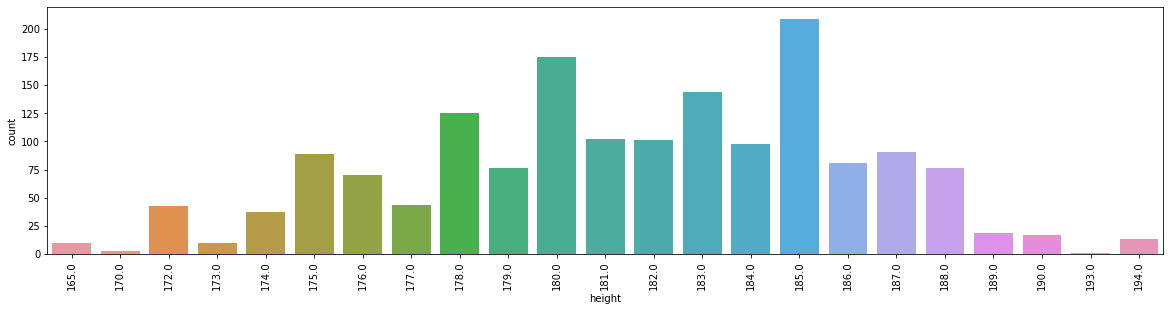

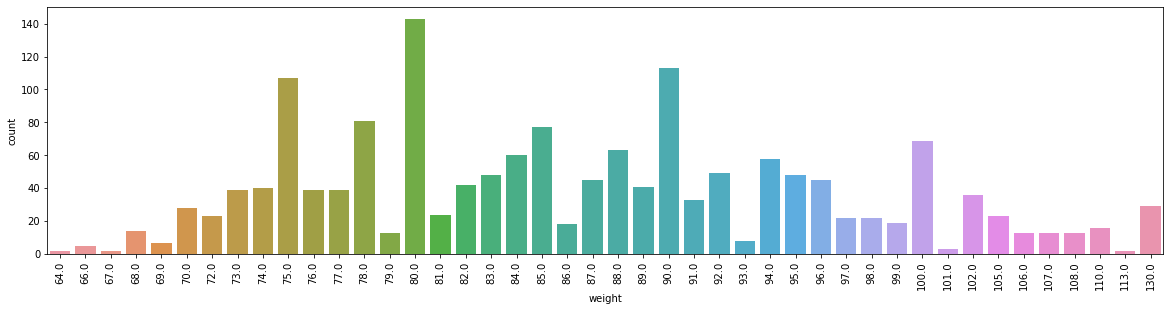

In [97]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
sns.countplot(data = regular_season_HW_OPS, x = 'height')
plt.xlabel('height')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize = (20,10))
plt.subplot(2,1,2)
sns.countplot(data = regular_season_HW_OPS, x = 'weight')
plt.xlabel('weight')
plt.xticks(rotation=90)
plt.show()

In [98]:
regular_season_HW_OPS['W/H']=regular_season_HW_OPS['weight'] / regular_season_HW_OPS['height']
regular_season_HW_OPS.head(3)

,height/weight,OPS,OBP,SLG,height,weight,W/H
0,177cm/93kg,0.902,0.383,0.519,177.0,93.0,0.525424
1,180cm/72kg,0.000,0.000,0.000,180.0,72.0,0.400000
2,180cm/72kg,0.686,0.337,0.349,180.0,72.0,0.400000


C:\Users\jdu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


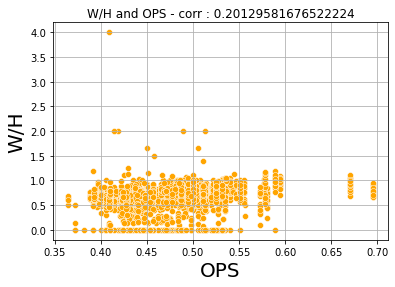

In [99]:
corr = regular_season_HW_OPS['W/H'].corr(regular_season_HW_OPS['OPS'])

sns.scatterplot(regular_season_HW_OPS['W/H'],
               regular_season_HW_OPS['OPS'],
               color = 'orange')

plt.title('W/H and OPS - corr : {}'.format(corr))
plt.xlabel('OPS', fontsize = 20)
plt.ylabel('W/H', fontsize = 20)
plt.grid()
plt.show()

In [101]:
regular_season_df2.info() # starting_salary 연봉

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2454 non-null   int64  
 1   batter_name      2454 non-null   object 
 2   year             2454 non-null   int64  
 3   team             2454 non-null   object 
 4   avg              2428 non-null   float64
 5   G                2454 non-null   int64  
 6   AB               2454 non-null   int64  
 7   R                2454 non-null   int64  
 8   H                2454 non-null   int64  
 9   2B               2454 non-null   int64  
 10  3B               2454 non-null   int64  
 11  HR               2454 non-null   int64  
 12  TB               2454 non-null   int64  
 13  RBI              2454 non-null   int64  
 14  SB               2454 non-null   int64  
 15  CS               2454 non-null   int64  
 16  BB               2454 non-null   int64  
 17  HBP           

In [102]:
set(regular_season_df2['starting_salary'])

{'100000달러',
 '10000만원',
 '11000만원',
 '12000만원',
 '13000만원',
 '14000만원',
 '15000만원',
 '16000만원',
 '17000만원',
 '18000만원',
 '20000만원',
 '21000만원',
 '23000만원',
 '25000만원',
 '27000만원',
 '28000만원',
 '300000달러',
 '30000만원',
 '3000만원',
 '33000만원',
 '4000만원',
 '43000만원',
 '45000만원',
 '50000달러',
 '5000만원',
 '6000만원',
 '6500만원',
 '7000만원',
 '8000만원',
 '9000만원',
 nan}